In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import amino_acid_codes

In [2]:
spectra = pd.read_csv('data/viral_spectra_dataset.csv').query('df == "nemu"')
spectra['taxid'] = spectra['taxid'].astype(int)
spectra.head()

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,virusname
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407,HBV
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990,RBSDV
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,WNV
3,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907,-,Influenza A virus,nemu,11320,flu_a
4,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983,norw


In [3]:
obs_aa_freqs = pd.read_csv('./data/aminoacid_freq_all_virus.csv', index_col=1)\
    .rename(columns=amino_acid_codes)
del obs_aa_freqs['refseq_id']
del obs_aa_freqs['X']
print(obs_aa_freqs.shape)
aa_order = obs_aa_freqs.columns[:20]
obs_aa_freqs_long = obs_aa_freqs.melt(
    var_name='aa', 
    value_name='obs_freq',
    ignore_index=False,
).reset_index()
obs_aa_freqs_long

(32, 20)


,taxid,aa,obs_freq
0,10407,Met,0.019324
1,10990,Met,0.024014
2,11082,Met,0.032028
3,1133363,Met,0.031650
4,1157337,Met,0.029342
...,...,...,...
635,54290,Trp,0.026105
636,57482,Trp,0.016380
637,693997,Trp,0.011901
638,694014,Trp,0.013802


In [4]:
eq_aa_freqs_long = pd.read_csv('./data/eq_freq_viral_groups_boxplot.csv')
eq_aa_freqs_long.loc[eq_aa_freqs_long.virusname == 'CoV20A', 'taxid'] = [2697049]*20
eq_aa_freqs_long = eq_aa_freqs_long[eq_aa_freqs_long.taxid != '-']
eq_aa_freqs_long['taxid'] = eq_aa_freqs_long['taxid'].astype(int)
eq_aa_freqs_long

,aa,eq_freq,taxid,virusname,sense
0,Arg,0.122635,3052230,HCV,+ssRNA
1,Pro,0.095629,3052230,HCV,+ssRNA
2,Ser,0.095571,3052230,HCV,+ssRNA
3,Ala,0.093153,3052230,HCV,+ssRNA
4,Gly,0.090677,3052230,HCV,+ssRNA
...,...,...,...,...,...
695,Lys,0.013792,10990,RBSDV,dsRNA
696,Gly,0.012196,10990,RBSDV,dsRNA
697,Met,0.011718,10990,RBSDV,dsRNA
698,Glu,0.007543,10990,RBSDV,dsRNA


In [5]:
# TODO add for flu-a amino acid content
eq_aa_freqs_long[~eq_aa_freqs_long.taxid.isin(obs_aa_freqs_long.taxid)]

,aa,eq_freq,taxid,virusname,sense
480,Lys,0.112241,11320,flu_a,-ssRNA
481,Arg,0.091079,11320,flu_a,-ssRNA
482,Ile,0.081715,11320,flu_a,-ssRNA
483,Leu,0.074964,11320,flu_a,-ssRNA
484,Ser,0.073775,11320,flu_a,-ssRNA
485,Asn,0.068530,11320,flu_a,-ssRNA
486,Thr,0.064574,11320,flu_a,-ssRNA
487,Glu,0.058749,11320,flu_a,-ssRNA
488,Val,0.055139,11320,flu_a,-ssRNA
489,Gly,0.045838,11320,flu_a,-ssRNA


In [6]:
obs_aa_freqs_long[~obs_aa_freqs_long.taxid.isin(eq_aa_freqs_long.taxid)]

,taxid,aa,obs_freq


In [7]:
freqs_merged = obs_aa_freqs_long.merge(eq_aa_freqs_long).set_index('taxid')
freqs_merged

,aa,obs_freq,eq_freq,virusname,sense
taxid,,,,,
10407,Met,0.019324,0.013406,HBV,dsRNA
10990,Met,0.024014,0.011718,RBSDV,dsRNA
11082,Met,0.032028,0.017244,WNV,+ssRNA
1133363,Met,0.031650,0.013555,SBV,-ssRNA
1157337,Met,0.029342,0.013410,PRV,dsRNA
...,...,...,...,...,...
54290,Trp,0.026105,0.023938,HGV,+ssRNA
57482,Trp,0.016380,0.012264,EBLV1,-ssRNA
693997,Trp,0.011901,0.006745,alCoV1,+ssRNA (Cov)


In [8]:
mean_gr_eq_freq = pd.read_csv('./data/mean_gr_eq_freq.csv').rename(columns={'eq_freq': 'eq_freq_mean'})
mean_gr_eq_freq = mean_gr_eq_freq[~mean_gr_eq_freq['group'].str.contains(r'CoV|ds')]
mean_gr_eq_freq['sense'] = mean_gr_eq_freq['group'].str.extract(r'(\+ssRNA|-ssRNA)')
del mean_gr_eq_freq['group']
mean_gr_eq_freq.head()

,aa,eq_freq_mean,sense
0,Leu,0.122447,+ssRNA
1,Ser,0.107977,+ssRNA
2,Arg,0.081763,+ssRNA
3,Val,0.071469,+ssRNA
4,Pro,0.063813,+ssRNA


In [9]:
gr_aa_mean_content = freqs_merged.groupby(['sense', 'aa'])[['obs_freq', 'eq_freq']].mean()
gr_aa_mean_content_pm = gr_aa_mean_content.loc[['+ssRNA', '-ssRNA']].join(mean_gr_eq_freq.set_index(['sense', 'aa']))
gr_aa_mean_content_pm.head()

obs_freq   eq_freq  eq_freq_mean
sense  aa                                   
+ssRNA Ala  0.078582  0.058535      0.058352
       Arg  0.054677  0.083132      0.081763
       Asn  0.039695  0.030838      0.029151
       Asp  0.050125  0.028323      0.029102
       Cys  0.021712  0.037574      0.039532

ShapiroResult(statistic=np.float64(0.9342446351780298), pvalue=np.float64(0.18630212611518882))
ShapiroResult(statistic=np.float64(0.9444100340146485), pvalue=np.float64(0.29007866535113747))
PearsonRResult(statistic=np.float64(0.7771615186681914), pvalue=np.float64(5.545007200087332e-05))


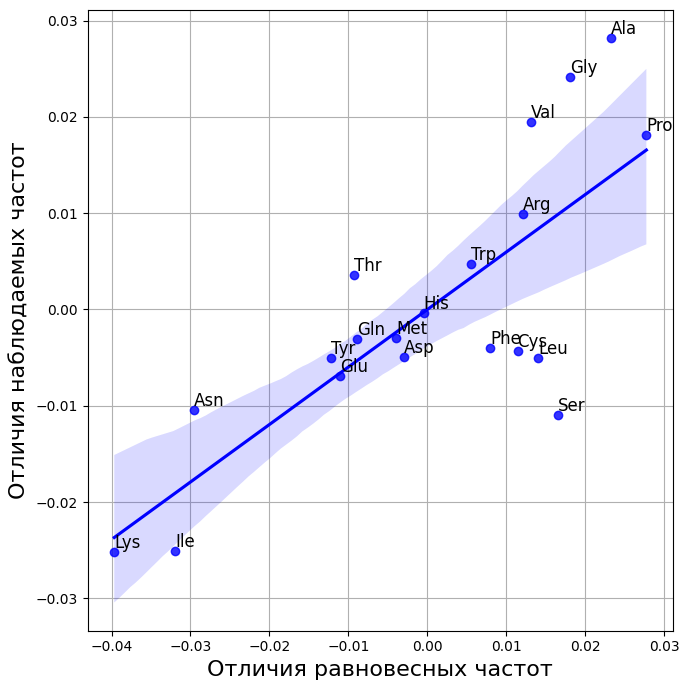

In [16]:
# graph for disser
from scipy.stats import spearmanr, pearsonr, shapiro

oe_diff = gr_aa_mean_content_pm.loc['+ssRNA'] - gr_aa_mean_content_pm.loc['-ssRNA']

print(shapiro(oe_diff['obs_freq']))
print(shapiro(oe_diff['eq_freq_mean']))
print(pearsonr(oe_diff['obs_freq'], oe_diff['eq_freq_mean']))

plt.figure(figsize=(7,7))
ax = sns.regplot(data=oe_diff, y='obs_freq', x='eq_freq_mean', color='blue')
ax.set_xlabel('Отличия равновесных частот', fontsize=16)
ax.set_ylabel('Отличия наблюдаемых частот', fontsize=16)
plt.grid(True)
ax.set_axisbelow(True)
for i, aa in enumerate(oe_diff.index):
    ax.text(
        oe_diff.loc[aa, 'eq_freq_mean'], oe_diff.loc[aa, 'obs_freq'], aa, fontsize=12, 
        verticalalignment='bottom', horizontalalignment='left',
)
plt.tight_layout()
plt.savefig('figures/mean_aa_freqs_diff.pdf')

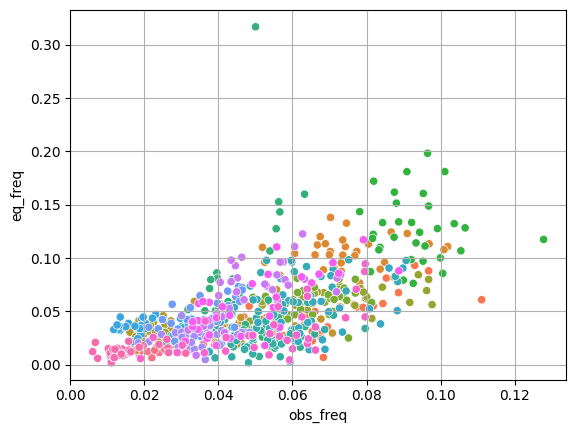

In [7]:
sns.scatterplot(freqs_merged, x='obs_freq', y='eq_freq', hue='aa', legend=False)
plt.grid()

In [63]:
common_taxid = set(freqs_merged.index).intersection(spectra.taxid)
len(common_taxid)

31

In [64]:
from itertools import combinations

from scipy.stats import pearsonr, spearmanr, shapiro
from statsmodels.stats.multitest import multipletests

data = []
for t1, t2 in combinations(common_taxid, 2):
    t1_freqs = freqs_merged.loc[t1].set_index('aa')
    t2_freqs = freqs_merged.loc[t2].set_index('aa')

    obs_diff = (t1_freqs['obs_freq'] - t2_freqs['obs_freq'])
    eq_diff = (t1_freqs['eq_freq'] - t2_freqs['eq_freq'])

    normality = [
        shapiro(t1_freqs['obs_freq']).pvalue,
        shapiro(t2_freqs['obs_freq']).pvalue,
        shapiro(t1_freqs['eq_freq']).pvalue,
        shapiro(t2_freqs['eq_freq']).pvalue,
    ]
    rho, p = pearsonr(obs_diff, eq_diff)
    # rho, p = spearmanr(obs_diff, eq_diff)
    data.append([t1, t2, rho, p])

df = pd.DataFrame(data, columns=['taxid1', 'taxid2', 'corr', 'pval'])
df['padj'] = multipletests(df['pval'], method='bonferroni')[1]
df

,taxid1,taxid2,corr,pval,padj
0,12162,28295,0.051683,0.828678,1.0
1,12162,57482,0.576577,0.007787,1.0
2,12162,54290,0.605635,0.004655,1.0
3,12162,38170,0.211099,0.371641,1.0
4,12162,10407,0.319946,0.169076,1.0
...,...,...,...,...,...
460,40054,694014,0.376496,0.101801,1.0
461,40054,118655,-0.023480,0.921728,1.0
462,1933178,694014,0.132632,0.577236,1.0
463,1933178,118655,0.428641,0.059334,1.0


<Axes: >

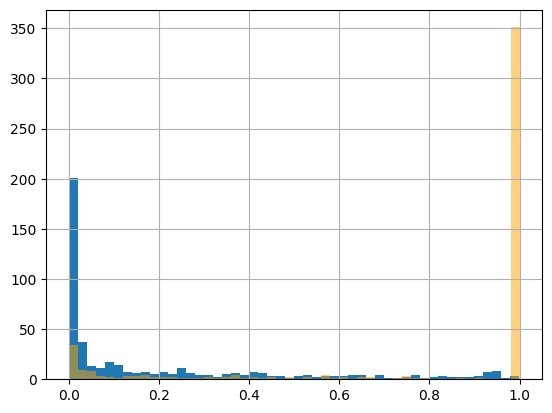

In [65]:
df['pval'].hist(bins=50)
df['padj'].hist(bins=50, alpha=0.5, color='orange')

### compare with spectrum

In [66]:
from scipy.spatial.distance import pdist, squareform

cossim = pd.DataFrame(1-squareform(pdist(spectra.iloc[:, :12], metric='cosine')), 
             index=spectra.taxid,
             columns=spectra.taxid)

In [67]:
df['cossim'] = df.apply(lambda x: cossim.loc[x['taxid1'], x['taxid2']], axis=1)
df['significant'] = df.padj < 0.05

In [68]:
df[[ 'corr', 'cossim']].corr(method='spearman').round(2)

,corr,cossim
corr,1.00,-0.34
cossim,-0.34,1.00


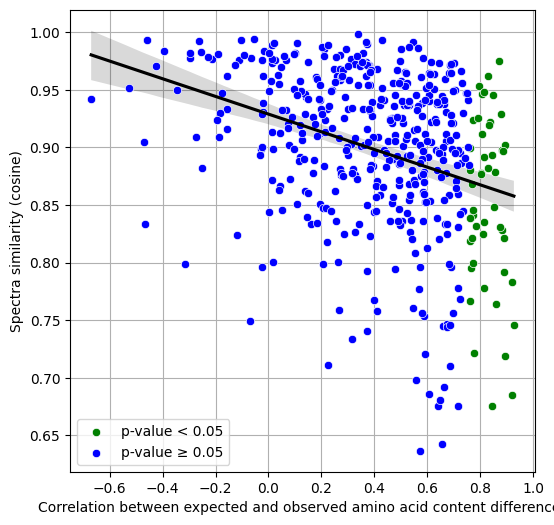

In [69]:
plt.figure(figsize=(6,6))
sns.regplot(df, x='corr',  y='cossim', order=1, scatter=False, color='k')
sns.scatterplot(df.query('padj < 0.05'), x='corr',  y='cossim', c='green', label='p-value < 0.05')
ax = sns.scatterplot(df.query('padj > 0.05'), x='corr',  y='cossim', c='blue', label='p-value ≥ 0.05')
plt.xlabel('Correlation between expected and observed amino acid content differences')
plt.ylabel('Spectra similarity (cosine)')
plt.grid()
ax.set_axisbelow(True)


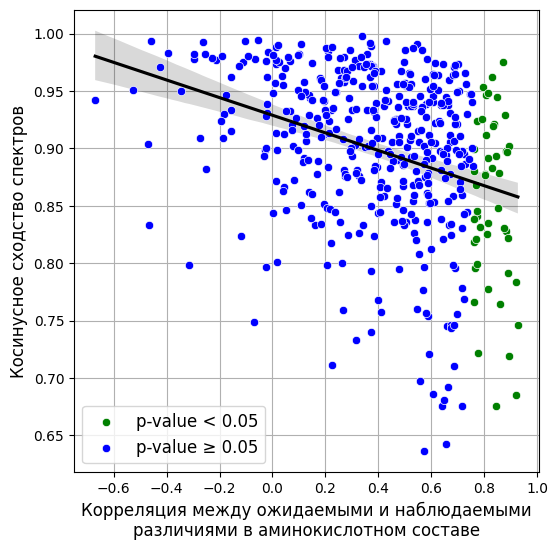

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(df, x='corr',  y='cossim', order=1, scatter=False, color='k')
sns.scatterplot(df.query('padj < 0.05'), x='corr',  y='cossim', c='green', label='p-value < 0.05')
ax = sns.scatterplot(df.query('padj > 0.05'), x='corr',  y='cossim', c='blue', label='p-value ≥ 0.05')
plt.xlabel('Корреляция между ожидаемыми и наблюдаемыми\nразличиями в аминокислотном составе', fontsize=12)
plt.ylabel('Косинусное сходство спектров', fontsize=12)
plt.grid()
plt.legend(fontsize=12)
ax.set_axisbelow(True)

In [70]:
df.sort_values('corr', ascending=False).tail(10)

,taxid1,taxid2,corr,pval,padj,cossim,significant
287,138948,351073,-0.298052,0.201832,1.00000,0.982082,False
411,3052763,198112,-0.315377,0.175588,1.00000,0.798525,False
374,12110,11983,-0.344446,0.136969,1.00000,0.949631,False
371,3052493,1933178,-0.394179,0.085478,1.00000,0.983535,False
392,11983,351073,-0.423684,0.062664,1.00000,0.970936,False
441,162145,1933178,-0.460813,0.040872,1.00000,0.993348,False
143,10407,1678143,-0.465631,0.038543,1.00000,0.833206,False
114,38170,10407,-0.470116,0.036468,1.00000,0.904311,False
363,3052493,3052763,-0.526507,0.017083,1.00000,0.951339,False
353,11082,351073,-0.669951,0.001230,0.57216,0.942478,False


## PCA

In [79]:
freqs_merged.pivot(columns='aa', values='obs_freq')

aa,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,Ile,Leu,Lys,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val
taxid,,,,,,,,,,,,,,,,,,,,
10407,0.053140,0.063241,0.032938,0.027229,0.036451,0.036451,0.025911,0.064119,0.027229,0.040843,0.127800,0.022398,0.019324,0.056214,0.088713,0.101888,0.065876,0.031181,0.027229,0.051823
10990,0.039141,0.041680,0.070771,0.062097,0.015762,0.032265,0.056702,0.037554,0.024331,0.070983,0.101132,0.066222,0.024014,0.063260,0.034486,0.090976,0.056702,0.007405,0.042526,0.061991
11082,0.081800,0.057996,0.037654,0.044579,0.020342,0.024670,0.059944,0.088293,0.020558,0.050422,0.087427,0.056481,0.032028,0.031811,0.041117,0.060593,0.074659,0.026401,0.024886,0.078338
11983,0.077440,0.052548,0.041881,0.053339,0.013038,0.046227,0.054524,0.083761,0.022521,0.049388,0.081786,0.048202,0.027262,0.036349,0.065192,0.074279,0.062821,0.015804,0.024891,0.068748
12092,0.054358,0.039533,0.045597,0.058850,0.019317,0.040881,0.053908,0.061995,0.023360,0.063792,0.088050,0.061096,0.032120,0.053908,0.043127,0.076819,0.059299,0.016173,0.035040,0.072776
12110,0.085334,0.046312,0.046312,0.060034,0.015009,0.033448,0.057033,0.067753,0.026587,0.043739,0.083619,0.060034,0.024014,0.047599,0.055746,0.051887,0.070326,0.010292,0.035163,0.079760
12162,0.061412,0.073017,0.039491,0.061090,0.023050,0.018375,0.049323,0.057382,0.019665,0.043681,0.099130,0.049645,0.019665,0.053514,0.037556,0.100903,0.054803,0.006770,0.037556,0.093972
12637,0.066057,0.057505,0.040401,0.039221,0.016809,0.030080,0.071070,0.080802,0.019758,0.064878,0.092598,0.063993,0.038927,0.029490,0.043055,0.056620,0.076968,0.026541,0.021233,0.063993
28295,0.067572,0.036031,0.056511,0.055197,0.032965,0.029132,0.039098,0.068777,0.019165,0.048626,0.090899,0.053663,0.018618,0.056292,0.035812,0.074581,0.061877,0.011718,0.045778,0.097689


In [80]:
freqs_merged

,aa,obs_freq,eq_freq,virusname,sense
taxid,,,,,
10407,Met,0.019324,0.013406,HBV,dsRNA
10990,Met,0.024014,0.011718,RBSDV,dsRNA
11082,Met,0.032028,0.017244,WNV,+ssRNA
1133363,Met,0.031650,0.013555,SBV,-ssRNA
1157337,Met,0.029342,0.013410,PRV,dsRNA
...,...,...,...,...,...
54290,Trp,0.026105,0.023938,HGV,+ssRNA
57482,Trp,0.016380,0.012264,EBLV1,-ssRNA
693997,Trp,0.011901,0.006745,alCoV1,+ssRNA (Cov)


In [115]:
from sklearn.decomposition import PCA

obs_aa_freqs_sample = freqs_merged.pivot(columns='aa', values='obs_freq').loc[list(common_taxid)]
eq_aa_freqs_sample  = freqs_merged.pivot(columns='aa', values='eq_freq').loc[list(common_taxid), obs_aa_freqs_sample.columns]
annot = freqs_merged[['virusname', 'sense']].drop_duplicates()

# X = pd.concat([obs_aa_freqs_sample, eq_aa_freqs_sample])
X = obs_aa_freqs_sample

pca = PCA(2)
pca.fit(X)

obs_pca = pd.DataFrame(pca.transform(obs_aa_freqs_sample), 
                       columns=['PC1', 'PC2'], 
                       index=obs_aa_freqs_sample.index).join(annot, how='inner')
eq_pca = pd.DataFrame(pca.transform(eq_aa_freqs_sample), 
                      columns=['PC1', 'PC2'], 
                      index=eq_aa_freqs_sample.index).join(annot, how='inner')

In [113]:
obs_pca.shape

(31, 4)

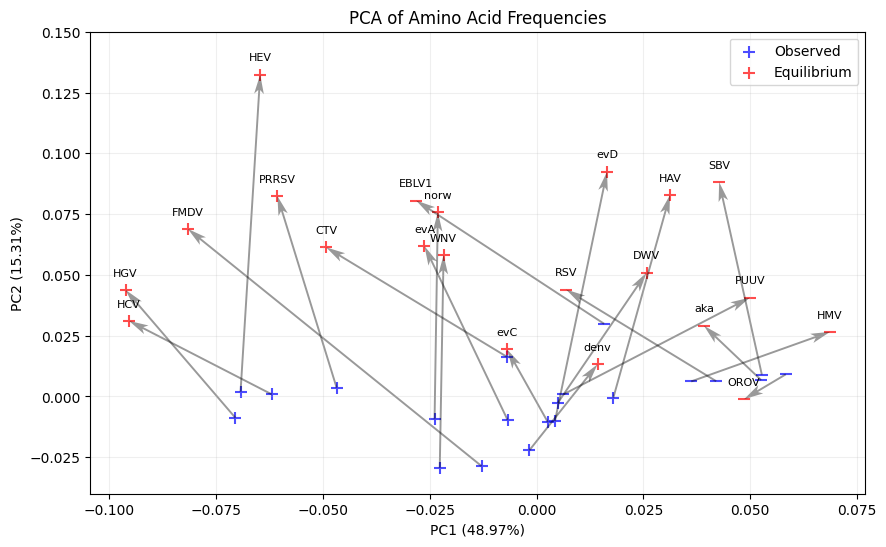

In [131]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the points
ax.scatter(obs_pca.query('sense == "+ssRNA"')['PC1'], 
           obs_pca.query('sense == "+ssRNA"')['PC2'], 
           color='blue', label='Observed', 
           alpha=0.7, marker='+', s=70)
ax.scatter(obs_pca.query('sense == "-ssRNA"')['PC1'], 
           obs_pca.query('sense == "-ssRNA"')['PC2'], 
           color='blue', 
           alpha=0.7, marker='_', s=70)
ax.scatter(eq_pca.query('sense == "+ssRNA"')['PC1'], 
           eq_pca.query('sense == "+ssRNA"')['PC2'], 
           color='red', label='Equilibrium', 
           alpha=0.7, marker='+', s=70)
ax.scatter(eq_pca.query('sense == "-ssRNA"')['PC1'], 
           eq_pca.query('sense == "-ssRNA"')['PC2'], 
           color='red', 
           alpha=0.7, marker='_', s=70)

# Plot arrows
for taxid in obs_pca[obs_pca.sense.isin(['+ssRNA', '-ssRNA'])].index.intersection(eq_pca.index):
    ax.quiver(
        obs_pca.loc[taxid, 'PC1'], obs_pca.loc[taxid, 'PC2'], 
        eq_pca.loc[taxid, 'PC1'] - obs_pca.loc[taxid, 'PC1'], 
        eq_pca.loc[taxid, 'PC2'] - obs_pca.loc[taxid, 'PC2'], 
        angles='xy', scale_units='xy', scale=1, color='k', 
        alpha=0.4, width=0.0025, headwidth=5, headlength=10, headaxislength=8,
    )
    # Add labels for some points
    ax.annotate(
        obs_pca.loc[taxid, 'virusname'],
        (eq_pca.loc[taxid, 'PC1'], eq_pca.loc[taxid, 'PC2']), 
        textcoords="offset points", 
        xytext=(0, 10), 
        ha='center', 
        fontsize=8,
    )


# Add labels and legend
ax.legend()
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
ax.set_ylim(-0.04, 0.15)
plt.title('PCA of Amino Acid Frequencies')
plt.grid(alpha=0.2)
plt.show()

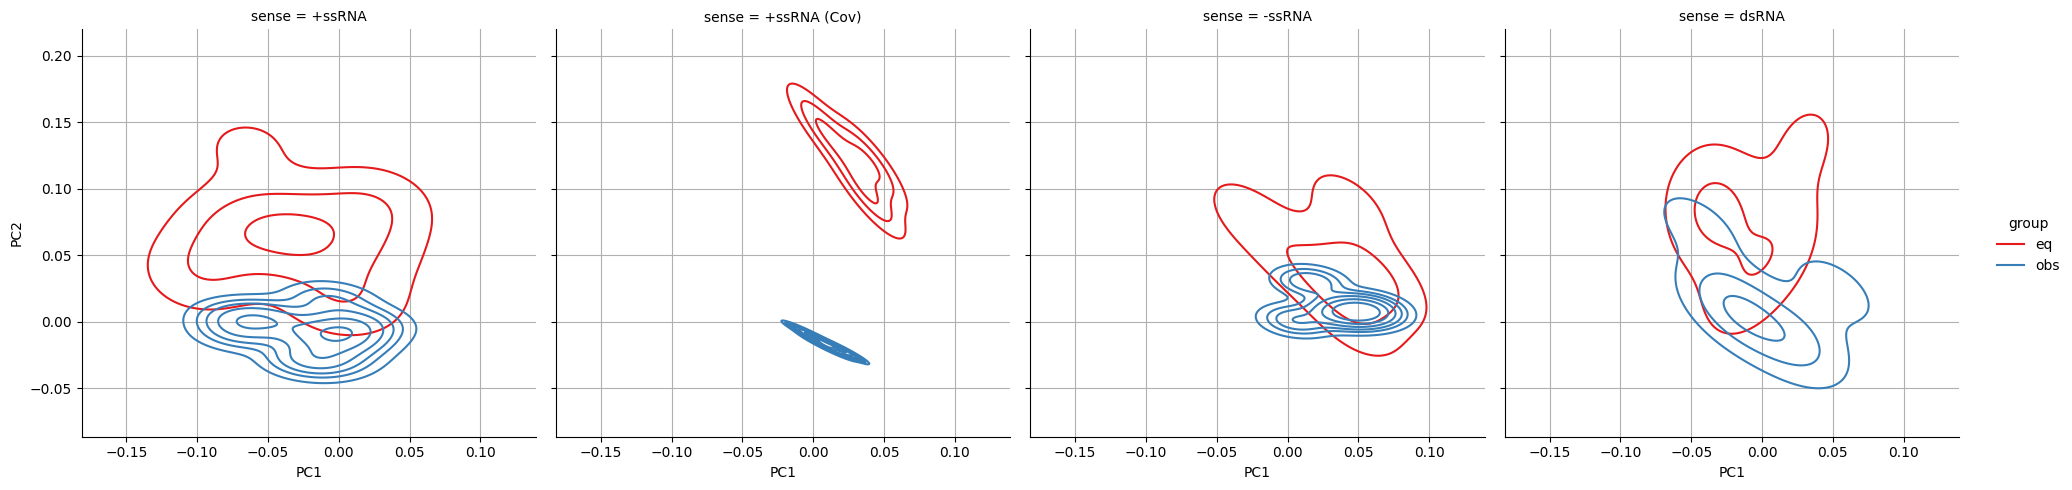

In [138]:
g = sns.displot(
    pd.concat([obs_pca.assign(group='obs'), eq_pca.assign(group='eq')]),
    x='PC1', y='PC2',
    hue='group',
    hue_order=['eq', 'obs'],
    col='sense',
    kind='kde',
    levels=10, 
    palette='Set1'
)
for ax in g.axes[0]:
    ax.grid()

## Distance to eq

In [10]:
freqs_merged['diff'] = (freqs_merged['obs_freq'] - freqs_merged['eq_freq']).abs()
df_citybl = freqs_merged.groupby(['sense', 'virusname'])['diff'].sum().rename('cityblock').reset_index()
df_citybl.to_csv('./data/distance_to_eq.csv')
df_citybl

,sense,virusname,cityblock
0,+ssRNA,CTV,0.271233
1,+ssRNA,DWV,0.394332
2,+ssRNA,FMDV,0.457886
3,+ssRNA,HAV,0.471421
4,+ssRNA,HCV,0.245934
5,+ssRNA,HEV,0.498448
6,+ssRNA,HGV,0.257162
7,+ssRNA,PRRSV,0.335306
8,+ssRNA,WNV,0.386314
9,+ssRNA,denv,0.291891


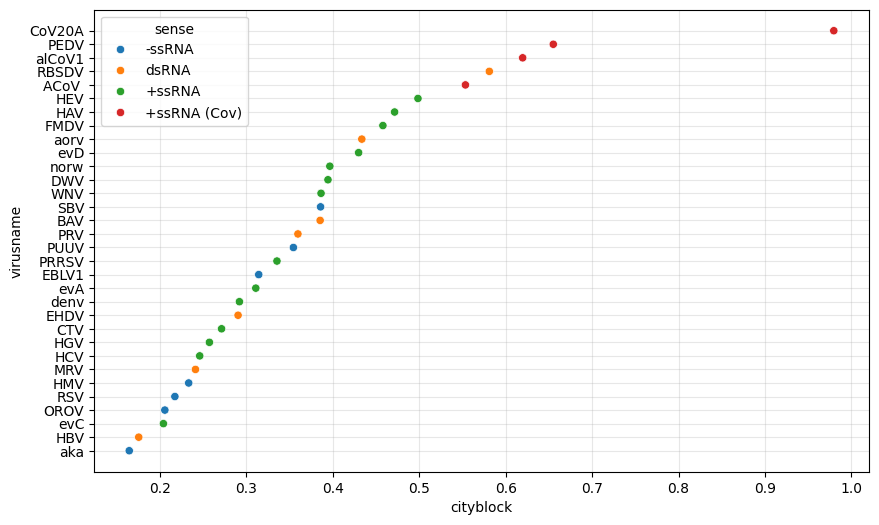

In [154]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    df_citybl.sort_values('cityblock', ascending=False), 
    y='virusname', x='cityblock', hue='sense',
    hue_order=['-ssRNA','dsRNA','+ssRNA','+ssRNA (Cov)']
)
plt.grid(alpha=0.3)
ax.set_axisbelow(True)